### **/!\** Les data (data_stocks) sont sur le drive : 

https://drive.google.com/open?id=1VhVWZy_SKK7io2FIVPAVjsYuPAkTUQj9

In [2]:
from scipy.stats import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [6]:
# lecture de la donnée
raw_data_stocks = pd.read_csv("data_stocks.csv")
print(raw_data_stocks.shape)

(41266, 502)


In [9]:
# preprocessing des dates
data_stocks = raw_data_stocks.copy()
data_stocks.DATE = pd.to_datetime(data_stocks.DATE, unit='s')
data_stocks['Days'] = pd.to_datetime(data_stocks['DATE'].astype(str).str[:10])
data_stocks['Hours'] = data_stocks['DATE'].astype(str).str[-8:-3]
data_stocks.head(1)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,NASDAQ.EXPD,NASDAQ.EXPE,NASDAQ.FAST,NASDAQ.FB,NASDAQ.FFIV,NASDAQ.FISV,NASDAQ.FITB,NASDAQ.FLIR,NASDAQ.FOX,NASDAQ.FOXA,NASDAQ.GILD,NASDAQ.GOOG,NASDAQ.GOOGL,NASDAQ.GRMN,NASDAQ.GT,NASDAQ.HAS,NASDAQ.HBAN,NASDAQ.HOLX,NASDAQ.HSIC,NASDAQ.IDXX,NASDAQ.ILMN,NASDAQ.INCY,NASDAQ.INFO,NASDAQ.INTC,NASDAQ.INTU,NASDAQ.ISRG,NASDAQ.JBHT,NASDAQ.KHC,NASDAQ.KLAC,NASDAQ.LKQ,NASDAQ.LRCX,NASDAQ.MAR,NASDAQ.MAT,NASDAQ.MCHP,NASDAQ.MDLZ,NASDAQ.MNST,NASDAQ.MSFT,NASDAQ.MU,NASDAQ.MYL,NASDAQ.NAVI,NASDAQ.NDAQ,NASDAQ.NFLX,NASDAQ.NTAP,NASDAQ.NTRS,NASDAQ.NVDA,NASDAQ.NWS,NASDAQ.NWSA,NASDAQ.ORLY,NASDAQ.PAYX,NASDAQ.PBCT,NASDAQ.PCAR,NASDAQ.PCLN,NASDAQ.PDCO,NASDAQ.PYPL,NASDAQ.QCOM,NASDAQ.QRVO,NASDAQ.REGN,NASDAQ.ROST,NASDAQ.SBUX,NASDAQ.SNI,NASDAQ.SNPS,NASDAQ.SPLS,NASDAQ.SRCL,NASDAQ.STX,NASDAQ.SWKS,NASDAQ.SYMC,NASDAQ.TRIP,NASDAQ.TROW,NASDAQ.TSCO,NASDAQ.TXN,NASDAQ.ULTA,NASDAQ.VIAB,NASDAQ.VRSK,NASDAQ.VRSN,NASDAQ.VRTX,NASDAQ.WBA,NASDAQ.WDC,NASDAQ.WFM,NASDAQ.WLTW,NASDAQ.WYNN,NASDAQ.XLNX,NASDAQ.XRAY,NASDAQ.ZION,NYSE.A,NYSE.AAP,NYSE.ABBV,NYSE.ABC,NYSE.ABT,NYSE.ACN,NYSE.ADM,NYSE.ADS,NYSE.AEE,NYSE.AEP,NYSE.AES,NYSE.AET,NYSE.AFL,NYSE.AGN,NYSE.AIG,NYSE.AIV,NYSE.AIZ,NYSE.AJG,NYSE.ALB,NYSE.ALK,NYSE.ALL,NYSE.ALLE,NYSE.AME,NYSE.AMG,NYSE.AMP,NYSE.AMT,NYSE.AN,NYSE.ANTM,NYSE.AON,NYSE.APA,NYSE.APC,NYSE.APD,NYSE.APH,NYSE.ARE,NYSE.ARNC,NYSE.AVB,NYSE.AVY,NYSE.AWK,NYSE.AXP,NYSE.AYI,NYSE.AZO,NYSE.BA,NYSE.BAC,NYSE.BAX,NYSE.BBT,NYSE.BBY,NYSE.BCR,NYSE.BDX,NYSE.BEN,NYSE.BF.B,NYSE.BHI,NYSE.BK,NYSE.BLK,NYSE.BLL,NYSE.BMY,NYSE.BRK.B,NYSE.BSX,NYSE.BWA,NYSE.BXP,NYSE.C,NYSE.CAG,NYSE.CAH,NYSE.CAT,NYSE.CB,NYSE.CBG,NYSE.CBS,NYSE.CCI,NYSE.CCL,NYSE.CF,NYSE.CFG,NYSE.CHD,NYSE.CHK,NYSE.CI,NYSE.CL,NYSE.CLX,NYSE.CMA,NYSE.CMG,NYSE.CMI,NYSE.CMS,NYSE.CNC,NYSE.CNP,NYSE.COF,NYSE.COG,NYSE.COH,NYSE.COL,NYSE.COO,NYSE.COP,NYSE.COTY,NYSE.CPB,NYSE.CRM,NYSE.CSRA,NYSE.CTL,NYSE.CVS,NYSE.CVX,NYSE.CXO,NYSE.D,NYSE.DAL,NYSE.DD,NYSE.DE,NYSE.DFS,NYSE.DG,NYSE.DGX,NYSE.DHI,NYSE.DHR,NYSE.DIS,NYSE.DLPH,NYSE.DLR,NYSE.DOV,NYSE.DOW,NYSE.DPS,NYSE.DRI,NYSE.DTE,NYSE.DUK,NYSE.DVA,NYSE.DVN,NYSE.DXC,NYSE.ECL,NYSE.ED,NYSE.EFX,NYSE.EIX,NYSE.EL,NYSE.EMN,NYSE.EMR,NYSE.EOG,NYSE.EQR,NYSE.EQT,NYSE.ES,NYSE.ESS,NYSE.ETN,NYSE.ETR,NYSE.EVHC,NYSE.EW,NYSE.EXC,NYSE.EXR,NYSE.F,NYSE.FBHS,NYSE.FCX,NYSE.FDX,NYSE.FE,NYSE.FIS,NYSE.FL,NYSE.FLR,NYSE.FLS,NYSE.FMC,NYSE.FRT,NYSE.FTI,NYSE.FTV,NYSE.GD,NYSE.GE,NYSE.GGP,NYSE.GIS,NYSE.GLW,NYSE.GM,NYSE.GPC,NYSE.GPN,NYSE.GPS,NYSE.GS,NYSE.GWW,NYSE.HAL,NYSE.HBI,NYSE.HCA,NYSE.HCN,NYSE.HCP,NYSE.HD,NYSE.HES,NYSE.HIG,NYSE.HOG,NYSE.HON,NYSE.HP,NYSE.HPE,NYSE.HPQ,NYSE.HRB,NYSE.HRL,NYSE.HRS,NYSE.HST,NYSE.HSY,NYSE.HUM,NYSE.IBM,NYSE.ICE,NYSE.IFF,NYSE.IP,NYSE.IPG,NYSE.IR,NYSE.IRM,NYSE.IT,NYSE.ITW,NYSE.IVZ,NYSE.JCI,NYSE.JEC,NYSE.JNJ,NYSE.JNPR,NYSE.JPM,NYSE.JWN,NYSE.K,NYSE.KEY,NYSE.KIM,NYSE.KMB,NYSE.KMI,NYSE.KMX,NYSE.KO,NYSE.KORS,NYSE.KR,NYSE.KSS,NYSE.KSU,NYSE.L,NYSE.LB,NYSE.LEG,NYSE.LEN,NYSE.LH,NYSE.LLL,NYSE.LLY,NYSE.LMT,NYSE.LNC,NYSE.LNT,NYSE.LOW,NYSE.LUK,NYSE.LUV,NYSE.LVLT,NYSE.LYB,NYSE.M,NYSE.MA,NYSE.MAA,NYSE.MAC,NYSE.MAS,NYSE.MCD,NYSE.MCK,NYSE.MCO,NYSE.MDT,NYSE.MET,NYSE.MHK,NYSE.MKC,NYSE.MLM,NYSE.MMC,NYSE.MMM,NYSE.MNK,NYSE.MO,NYSE.MON,NYSE.MOS,NYSE.MPC,NYSE.MRK,NYSE.MRO,NYSE.MS,NYSE.MSI,NYSE.MTB,NYSE.MUR,NYSE.NBL,NYSE.NEE,NYSE.NEM,NYSE.NFX,NYSE.NI,NYSE.NKE,NYSE.NLSN,NYSE.NOC,NYSE.NOV,NYSE.NRG,NYSE.NSC,NYSE.NUE,NYSE.NWL,NYSE.O,NYSE.OKE,NYSE.OMC,NYSE.ORCL,NYSE.OXY,NYSE.PCG,NYSE.PEG,NYSE.PEP,NYSE.PFE,NYSE.PFG,NYSE.PG,NYSE.PGR,NYSE.PH,NYSE.PHM,NYSE.PKI,NYSE.PLD,NYSE.PM,NYSE.PNC,NYSE.PNR,NYSE.PNW,NYSE.PPG,NYSE.PPL,NYSE.PRGO,NYSE.PRU,NYSE.PSA,NYSE.PSX,NYSE.PVH,NYSE.PW

## Zoom sur AAPL
https://www.datacamp.com/community/tutorials/finance-python-trading

[Adjusted Closing Price vs. Closing Price](https://finance.zacks.com/adjusted-closing-price-vs-closing-price-9991.html)

Figuring out the values of stocks can be more complex than checking their price on any specific day. Stocks have both a "closing price" and an "adjusted closing price." These prices reflect two different ways of determining the value of the stock. The closing price is simply the cash value of that specific piece of stock at day's end while the adjusted closing price reflects the closing price of the stock in relation to other stock attributes. In general, the adjusted closing price is considered to be a more technically accurate reflection of the true value of the stock.

**The closing price of a stock is only its cash value at day's end, whereas the adjusted closing price factors in things like dividends, stock splits and new stock offerings**

In [49]:
#data_stocks[[col for col in data_stocks.columns if 'AAPP' in col]]
aapl = data_stocks[["DATE", "Days","Hours","NASDAQ.AAPL"]].set_index('DATE')
aapl = aapl[aapl.Hours == "20:00"][["NASDAQ.AAPL"]].rename(columns={"NASDAQ.AAPL":"Adj Close"})
print(aapl.shape)
aapl.head()

(105, 1)


,Adj Close
DATE,
2017-04-03 20:00:00,143.700
2017-04-04 20:00:00,144.770
2017-04-05 20:00:00,144.020
2017-04-06 20:00:00,143.685
2017-04-07 20:00:00,143.340


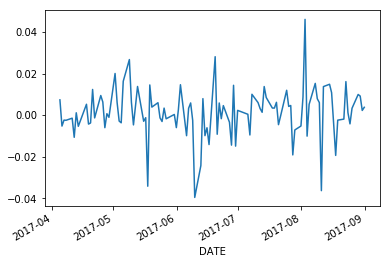

In [62]:
# Adj Close => valeur de 'fermeture' à 20h. Assign `Adj Close` to `daily_close`
daily_close = aapl["Adj Close"]

# Daily returns
daily_pct_change = daily_close.pct_change()
# autre méthode : daily_pct_change = daily_close / daily_close.shift(1) - 1

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
#print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
daily_log_returns.plot()

In [58]:
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Adj Close
DATE,
2017-04-30,NaN
2017-08-31,0.064549


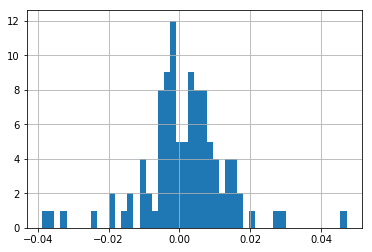

count    105.000000
mean       0.001329
std        0.011936
min       -0.038777
25%       -0.004022
50%        0.001443
75%        0.006406
max        0.047251
Name: Adj Close, dtype: float64


In [63]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

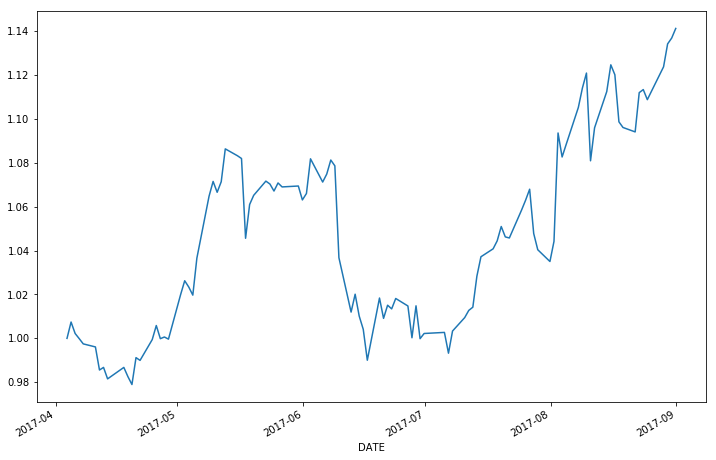

In [66]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
cum_daily_return.plot(figsize=(12,8))


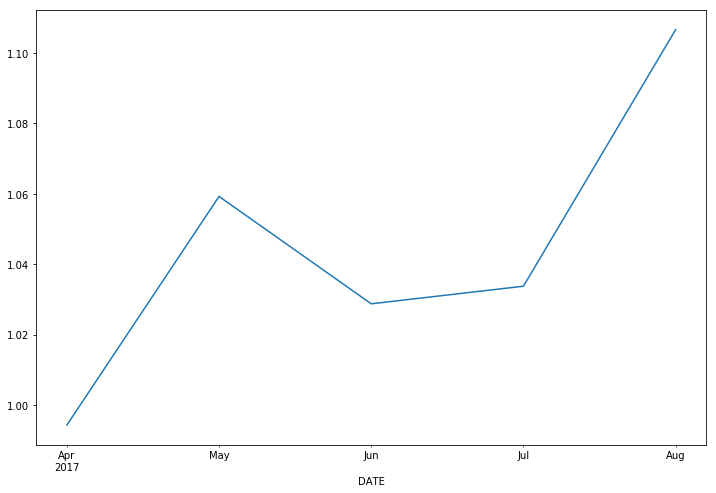

In [67]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
cum_monthly_return.plot(figsize=(12,8))

In [92]:
#[col for col in data_stocks.columns if 'GOOG' in col]
all_data = data_stocks[["DATE", "Days","Hours","NASDAQ.AAPL",'NASDAQ.MSFT', 'NYSE.IBM', 'NASDAQ.GOOG']].set_index('DATE')
all_data = all_data[all_data.Hours == "20:00"].rename(
    columns={"NASDAQ.AAPL":"AAPPL","NASDAQ.MSFT":"MSFT", "NYSE.IBM":"IBM", "NASDAQ.GOOG":"GOOG"}).drop(
    columns=["Days","Hours"])

all_data.head(3)

,AAPPL,MSFT,IBM,GOOG
DATE,,,,
2017-04-03 20:00:00,143.70,65.53,174.52,838.55
2017-04-04 20:00:00,144.77,65.73,174.52,834.57
2017-04-05 20:00:00,144.02,65.56,172.88,831.41


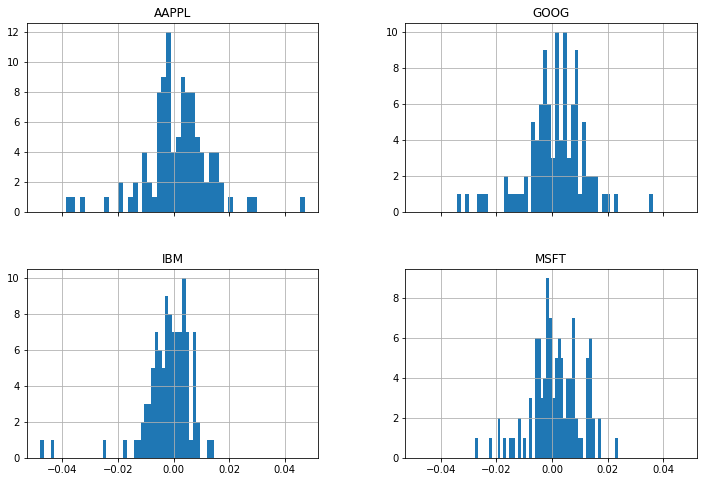

In [94]:
# Isolate the `Adj Close`
daily_close_px = all_data

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

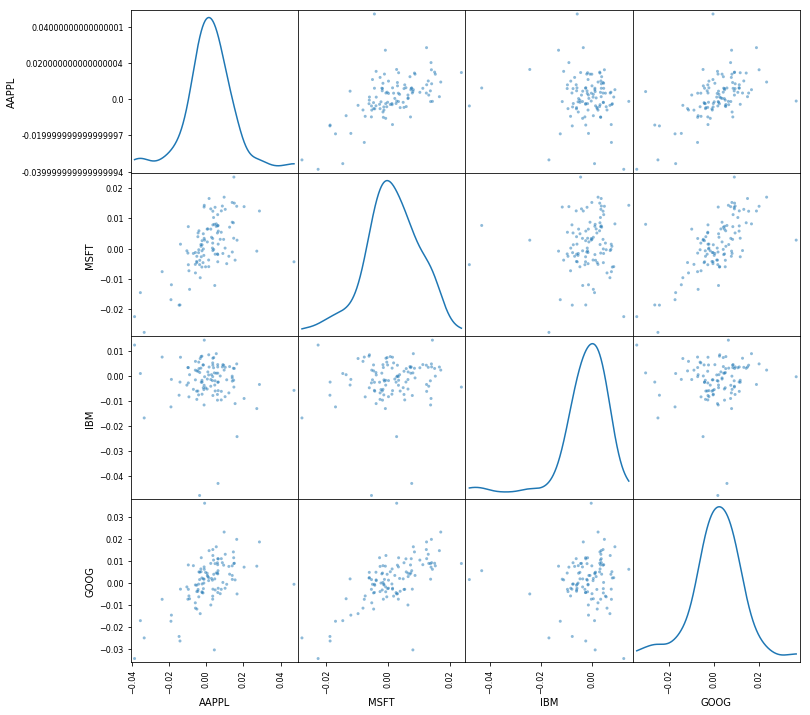

In [99]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.scatter_matrix(daily_pct_change, diagonal='kde', figsize=(12,12))

# Show the plot
plt.show()

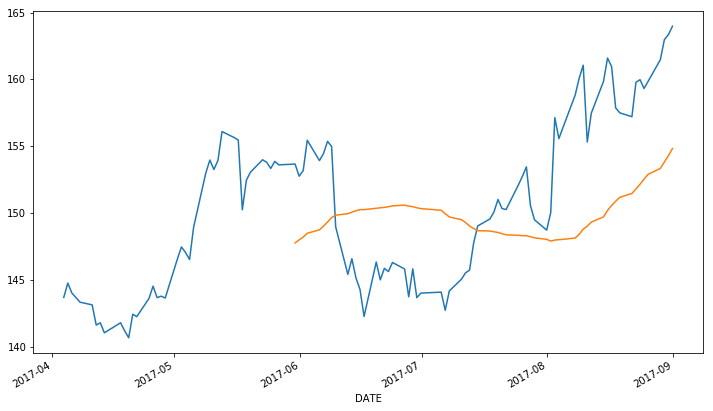

In [104]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
aapl['Adj Close'].plot(figsize=(12,7))
moving_avg.plot(figsize=(12,7))

### Calcul de la volatilité 

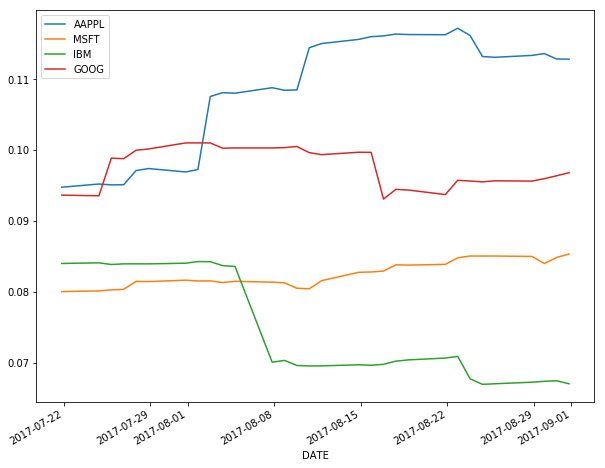

In [106]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot²
plt.show()

In [118]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm

# Import the `datetools` module from `pandas`
from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))
all_returns.head()


In [121]:
# Isolate the AAPL returns 
aapl_returns = all_returns['AAPPL']

# Isolate the MSFT returns
msft_returns = all_returns['MSFT']

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     56.16
Date:                Fri, 08 May 2020   Prob (F-statistic):           2.51e-11
Time:                        20:20:14   Log-Likelihood:                 365.85
No. Observations:                 104   AIC:                            -727.7
Df Residuals:                     102   BIC:                            -722.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.982      0.3

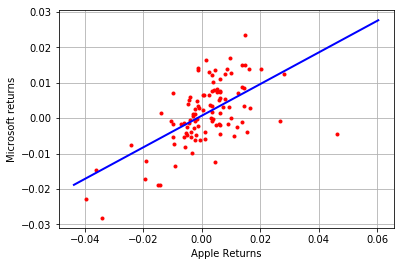

In [122]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

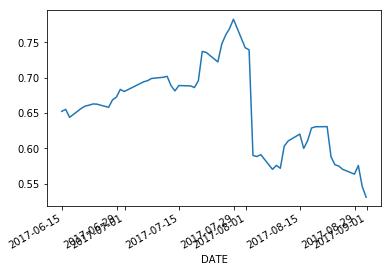

In [125]:
# Import matplotlib 
import matplotlib.pyplot as plt

# Plot the rolling correlation
return_data['MSFT'].rolling(window=50).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()

# Building A Trading Strategy With Python

# En conclusion
Notre échantillon de donnée n'est clairement pas adapté pour effectué ce genre d'analyse...
Il nous aurais fallu une time range plus grande... Sinon il faut faire l'étude par seconde plutot que par jour ? 